# Make wind forcing off coast of Argentina

In [2]:
# Load modules
%pylab inline
from netCDF4 import Dataset # to work with NetCDF files
from netCDF4 import MFDataset # to work with NetCDF files
import numpy as np
import matplotlib.pyplot as plt # to generate plots
from mpl_toolkits.basemap import Basemap # plot on map projections
from os.path import expanduser
home = expanduser("~") # Get users home directory
import os # operating system interface

Populating the interactive namespace from numpy and matplotlib


In [3]:
# Extract the variables
file ='/g/data1/v45/pas561/mom/input/wedpolywinds/u_10.nc'

nc = Dataset(file, mode='r') # file handle, open in read only mode
lat = nc.variables['LAT'][:]
lon = nc.variables['LON'][:]
u = nc.variables['U_10_MOD'][:]
nc.close() # close the file

file ='/g/data1/v45/pas561/mom/input/wedpolywinds/v_10.nc'

nc = Dataset(file, mode='r') # file handle, open in read only mode
v = nc.variables['V_10_MOD'][:]
nc.close() # close the file



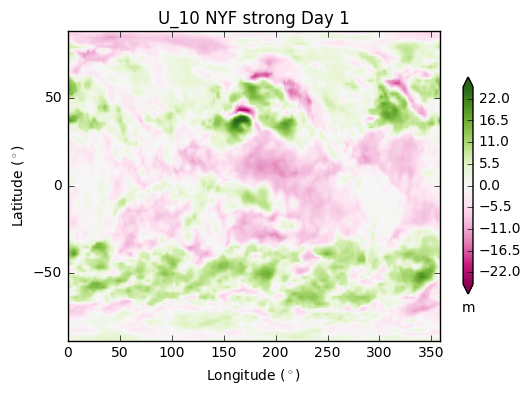

In [3]:
clev = np.arange(-25,25.5,0.5)

plt.contourf(lon,lat,u[0],cmap=plt.cm.PiYG,levels=clev,extend='both')
#plt.contourf(geolon_t,geolat_t,f.variables['vbot'][0],cmap=plt.cm.PiYG,levels=clev,extend='both')
cb=plt.colorbar(orientation='vertical',shrink = 0.7)
cb.ax.set_xlabel('m')

plt.ylabel('Latitude ($^\circ$)')
plt.xlabel('Longitude ($^\circ$)')
#plt.ylim([-80,90])
#plt.xlim([-280,80])
plt.title('U_10 NYF strong Day 1')

plt.show()
#plt.savefig('V.pdf')

## calc std NYF of winds

In [6]:
uvstd=np.ma.std(np.ma.sqrt(v**2 + u**2),axis=0)

In [73]:
print uvstd.shape

(94, 192)


In [74]:
print np.max(uvstd)

6.66370835039


In [75]:
print np.min(uvstd)

0.245780834837


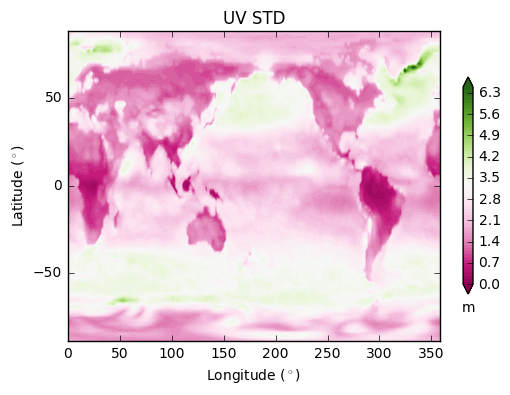

In [76]:
clev = np.arange(0,6.6,0.1)

plt.contourf(lon,lat,uvstd,cmap=plt.cm.PiYG,levels=clev,extend='both')
#plt.contourf(geolon_t,geolat_t,f.variables['vbot'][0],cmap=plt.cm.PiYG,levels=clev,extend='both')
cb=plt.colorbar(orientation='vertical',shrink = 0.7)
cb.ax.set_xlabel('m')

plt.ylabel('Latitude ($^\circ$)')
plt.xlabel('Longitude ($^\circ$)')
#plt.ylim([-80,90])
#plt.xlim([-280,80])
plt.title('UV NYF STD')

plt.show()

In [80]:
# Extract the variables
file ='/g/data1/v45/pas561/mom/input/core2iaf/u_10.1979to2007.nc'

nc = Dataset(file, mode='r') # file handle, open in read only mode
lat = nc.variables['LAT'][:]
lon = nc.variables['LON'][:]
u = nc.variables['U_10_MOD'][:]
nc.close() # close the file

file ='/g/data1/v45/pas561/mom/input/core2iaf/v_10.1979to2007.nc'

nc = Dataset(file, mode='r') # file handle, open in read only mode
v = nc.variables['V_10_MOD'][:]
nc.close() # close the file

In [81]:
uviafstd=np.ma.std(np.ma.sqrt(v**2 + u**2),axis=0)

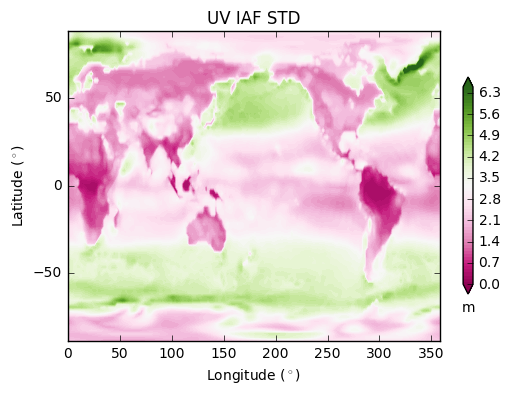

In [82]:
clev = np.arange(0,6.6,0.1)

plt.contourf(lon,lat,uviafstd,cmap=plt.cm.PiYG,levels=clev,extend='both')
#plt.contourf(geolon_t,geolat_t,f.variables['vbot'][0],cmap=plt.cm.PiYG,levels=clev,extend='both')
cb=plt.colorbar(orientation='vertical',shrink = 0.7)
cb.ax.set_xlabel('m')

plt.ylabel('Latitude ($^\circ$)')
plt.xlabel('Longitude ($^\circ$)')
#plt.ylim([-80,90])
#plt.xlim([-280,80])
plt.title('UV IAF STD')

plt.show()

## create the Strong forcing off of Argentina

In [200]:
# Extract the variables
file ='/g/data1/v45/pas561/mom/input/gfdl_nyf_1080/u_10.30Sup15.nc'

nc = Dataset(file, mode='r') # file handle, open in read only mode
lat = nc.variables['LAT'][:]
lon = nc.variables['LON'][:]
uf = nc.variables['U_10_MOD'][:]
nc.close() # close the file

file ='/g/data1/v45/pas561/mom/input/gfdl_nyf_1080/v_10.30Sup15.nc'

nc = Dataset(file, mode='r') # file handle, open in read only mode
vf = nc.variables['V_10_MOD'][:]
nc.close() # close the file

# Extract the variables
file ='/g/data1/v45/pas561/mom/input/gfdl_nyf_1080/u_10.nc'

nc = Dataset(file, mode='r') # file handle, open in read only mode
lat = nc.variables['LAT'][:]
lon = nc.variables['LON'][:]
uc = nc.variables['U_10_MOD'][:]
nc.close() # close the file

file ='/g/data1/v45/pas561/mom/input/gfdl_nyf_1080/v_10.nc'

nc = Dataset(file, mode='r') # file handle, open in read only mode
vc = nc.variables['V_10_MOD'][:]
nc.close() # close the file

In [158]:
ua=uf-uc

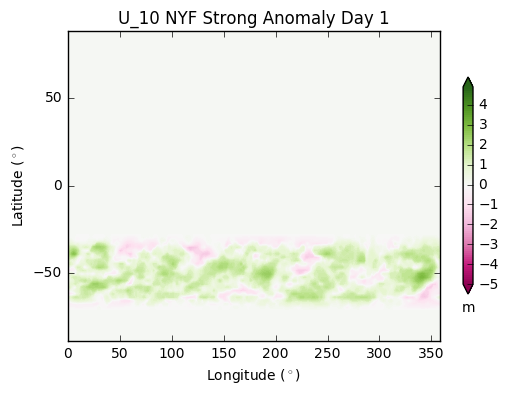

In [159]:
clev = np.arange(-5,5,0.1)

plt.contourf(lon,lat,ua[0],cmap=plt.cm.PiYG,levels=clev,extend='both')
#plt.contourf(geolon_t,geolat_t,f.variables['vbot'][0],cmap=plt.cm.PiYG,levels=clev,extend='both')
cb=plt.colorbar(orientation='vertical',shrink = 0.7)
cb.ax.set_xlabel('m')

plt.ylabel('Latitude ($^\circ$)')
plt.xlabel('Longitude ($^\circ$)')
#plt.ylim([-80,90])
#plt.xlim([-280,80])
plt.title('U_10 NYF Strong Anomaly Day 1')

plt.show()

In [173]:
#find values within lat lon bounds
tmp1=np.argwhere(lon>290)# and lon<320)
tmp2=np.argwhere(lon>320)# and lon<320)
tmp3=np.argwhere(lat>-55)# and lat<-45)
tmp4=np.argwhere(lat>-25)# and lat<-45)
print uc.shape

(1460, 94, 192)


In [208]:
# the zeros here convert it to an int64 instead of an array
lon_start, lon_end, lat_start, lat_end = tmp1[1][0], tmp2[1][0], tmp3[1][0], tmp4[1][0]
print type(lat_start)

<type 'numpy.int64'>


In [209]:
print tmp1[1], tmp2[1], tmp3[1], tmp4[1]

[156] [172] [19] [35]


In [210]:
um = uc.copy()
um[:,lat_start:lat_end+1, lon_start:lon_end+1] = uf[:,lat_start:lat_end+1, lon_start:lon_end+1]


#um[:,tmp3[1]:tmp4[1],tmp1[1]:tmp2[1]]=10 #uf[:,tmp3[1]:tmp4[1],tmp1[1]:tmp2[1]]*10
print um.shape

(1460, 94, 192)


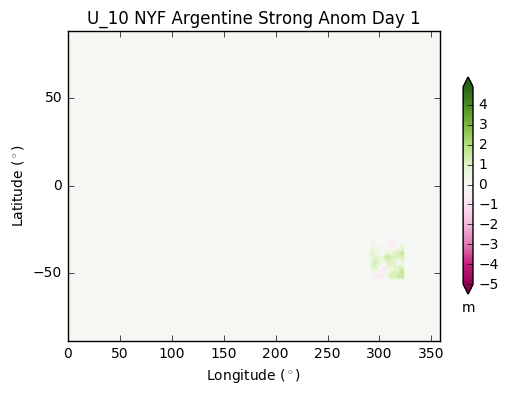

In [212]:
clev = np.arange(-5,5,0.1)

plt.contourf(lon,lat,um[0]-uc[0],cmap=plt.cm.PiYG,levels=clev,extend='both')
#plt.contourf(geolon_t,geolat_t,f.variables['vbot'][0],cmap=plt.cm.PiYG,levels=clev,extend='both')
cb=plt.colorbar(orientation='vertical',shrink = 0.7)
cb.ax.set_xlabel('m')

plt.ylabel('Latitude ($^\circ$)')
plt.xlabel('Longitude ($^\circ$)')
#plt.ylim([-80,90])
#plt.xlim([-280,80])
plt.title('U_10 NYF Argentine Strong Anom Day 1')

plt.show()
#plt.savefig('V.pdf')

## do the v component

In [214]:
vm = vc.copy()
vm[:,lat_start:lat_end+1, lon_start:lon_end+1] = vf[:,lat_start:lat_end+1, lon_start:lon_end+1]


#um[:,tmp3[1]:tmp4[1],tmp1[1]:tmp2[1]]=10 #uf[:,tmp3[1]:tmp4[1],tmp1[1]:tmp2[1]]*10
print um.shape



(1460, 94, 192)


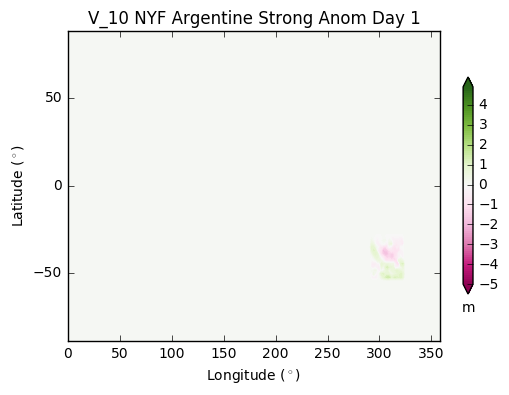

In [217]:
clev = np.arange(-5,5,0.1)

plt.contourf(lon,lat,vm[0]-vc[0],cmap=plt.cm.PiYG,levels=clev,extend='both')
#plt.contourf(geolon_t,geolat_t,f.variables['vbot'][0],cmap=plt.cm.PiYG,levels=clev,extend='both')
cb=plt.colorbar(orientation='vertical',shrink = 0.7)
cb.ax.set_xlabel('m')

plt.ylabel('Latitude ($^\circ$)')
plt.xlabel('Longitude ($^\circ$)')
#plt.ylim([-80,90])
#plt.xlim([-280,80])
plt.title('V_10 NYF Argentine Strong Anom Day 1')

plt.show()

## write to file

In [218]:
import netCDF4 as nc4

ofile = nc4.Dataset('/g/data1/v45/pas561/mom/input/gfdl_nyf_1080/u_10.30Sup15.Arg.nc', 'a')

var = ofile.variables['U_10_MOD']
print var.shape
print um.shape
var[:] = um

ofile.sync()
ofile.close()

(1460, 94, 192)
(1460, 94, 192)


In [219]:
ofile = nc4.Dataset('/g/data1/v45/pas561/mom/input/gfdl_nyf_1080/v_10.30Sup15.Arg.nc', 'a')

var = ofile.variables['V_10_MOD']
print var.shape
print vm.shape
var[:] = vm

ofile.sync()
ofile.close()

(1460, 94, 192)
(1460, 94, 192)


In [9]:
##Make Equatorial Wind Anomaly
# Extract the variables
file ='/g/data1/v45/pas561/mom/input/u_10.nc'

nc = Dataset(file, mode='r') # file handle, open in read only mode
lat = nc.variables['LAT'][:]
lon = nc.variables['LON'][:]
uc = nc.variables['U_10_MOD'][:]
nc.close() # close the file

file ='/g/data1/v45/pas561/mom/input/v_10.nc'

nc = Dataset(file, mode='r') # file handle, open in read only mode
vc = nc.variables['V_10_MOD'][:]
nc.close() # close the file




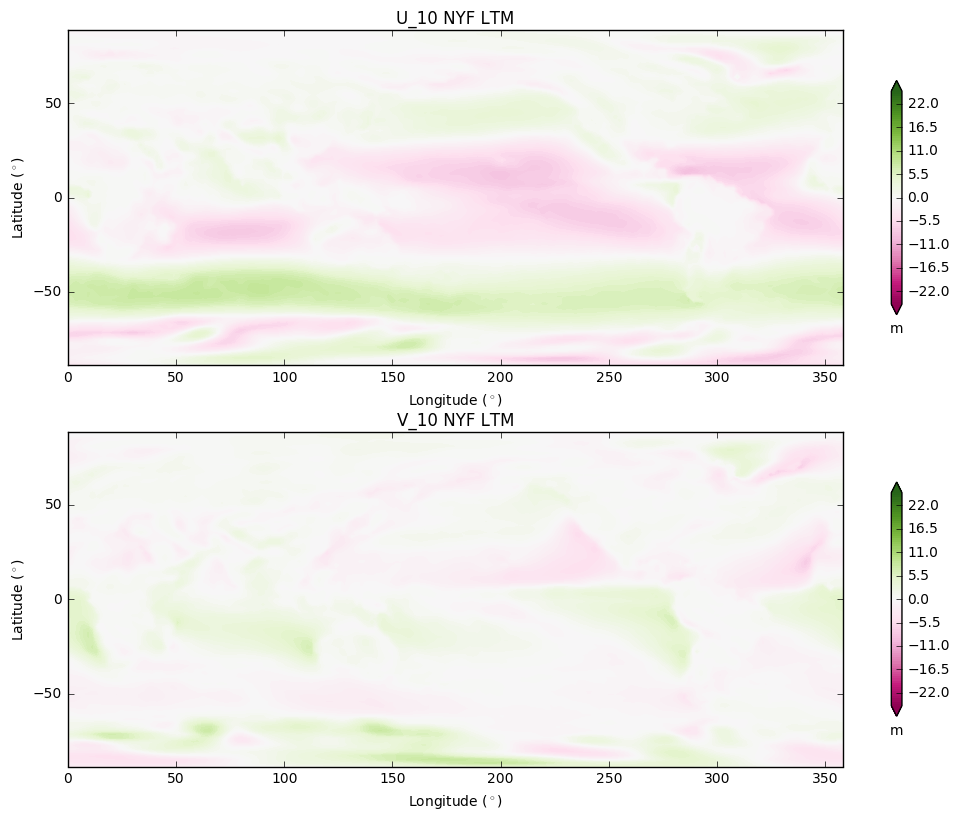

In [35]:
plt.figure(figsize(12.5,9.5))
x_formatter = matplotlib.ticker.ScalarFormatter(useOffset=False)

clev = np.arange(-25,25.5,0.5)

plt.subplot(211)
plt.contourf(lon,lat,np.mean(uc,axis=0),cmap=plt.cm.PiYG,levels=clev,extend='both')
#plt.contourf(geolon_t,geolat_t,f.variables['vbot'][0],cmap=plt.cm.PiYG,levels=clev,extend='both')
cb=plt.colorbar(orientation='vertical',shrink = 0.7)
cb.ax.set_xlabel('m')

plt.ylabel('Latitude ($^\circ$)')
plt.xlabel('Longitude ($^\circ$)')
#plt.ylim([-80,90])
#plt.xlim([-280,80])
plt.title('U_10 NYF LTM')

plt.subplot(212)
plt.contourf(lon,lat,np.mean(vc,axis=0),cmap=plt.cm.PiYG,levels=clev,extend='both')
#plt.contourf(geolon_t,geolat_t,f.variables['vbot'][0],cmap=plt.cm.PiYG,levels=clev,extend='both')
cb=plt.colorbar(orientation='vertical',shrink = 0.7)
cb.ax.set_xlabel('m')

plt.ylabel('Latitude ($^\circ$)')
plt.xlabel('Longitude ($^\circ$)')
#plt.ylim([-80,90])
#plt.xlim([-280,80])
plt.title('V_10 NYF LTM')
plt.show()
#plt.savefig('V.pdf')


In [36]:
#double the zonal wind speeds in East Equator or Atlantic.

In [10]:
#find values within lat lon bounds
tmp1=np.argwhere(lon>300)# and lon<320)
tmp2=np.argwhere(lon>325)# and lon<320)
tmp3=np.argwhere(lat>-3)# and lat<-45)
tmp4=np.argwhere(lat>2)# and lat<-45)

lon_start, lon_end, lat_start, lat_end = tmp1[0][0], tmp2[0][0], tmp3[0][0], tmp4[0][0]

print lon[lon_start], lon[lon_end], lat[lat_start], lat[lat_end] 

print uc.shape

301.875 326.25 -2.85710000992 2.85710000992
(1460, 94, 192)


In [11]:
u_add = np.mean(uc[:,lat_start:lat_end+1, lon_start:lon_end+1],axis=0)
print u_add.shape
u_add = np.mean(u_add,axis=0)
print u_add.shape
u_add = np.mean(u_add,axis=0)
print u_add.shape
print u_add

(4, 14)
(14,)
()
-3.53299


In [38]:
um = uc.copy()
um[:,lat_start:lat_end+1, lon_start:lon_end+1] = uc[:,lat_start:lat_end+1, lon_start:lon_end+1]*3


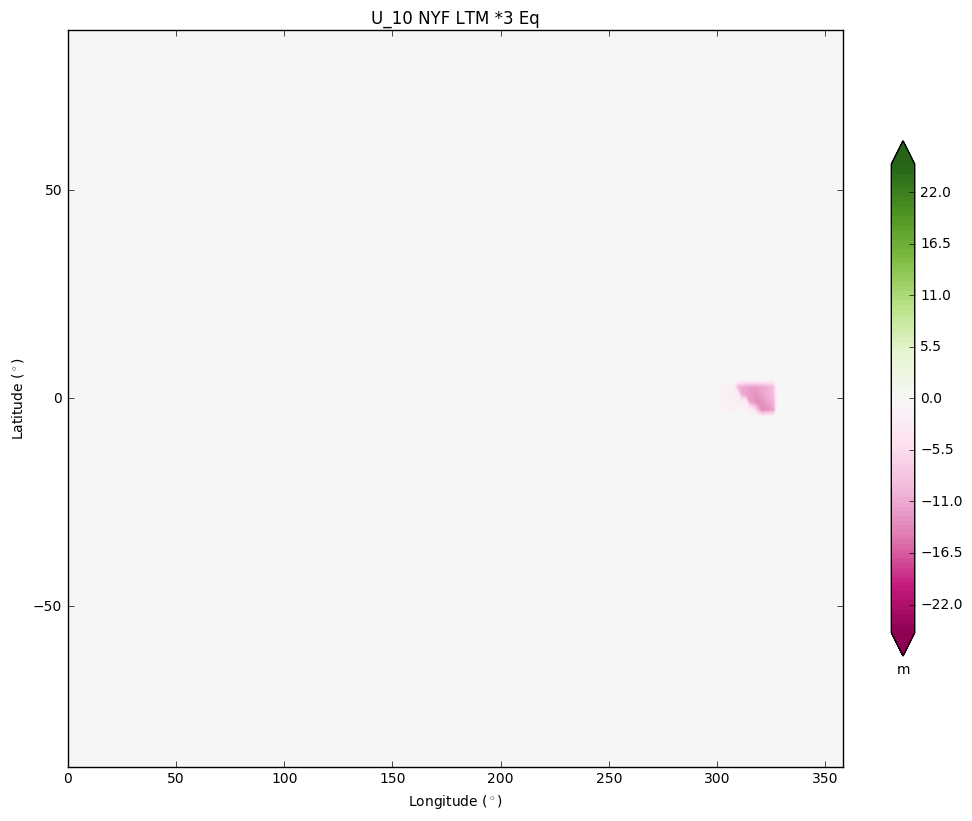

In [39]:
plt.contourf(lon,lat,np.mean(um,axis=0)-np.mean(uc,axis=0),cmap=plt.cm.PiYG,levels=clev,extend='both')
#plt.contourf(geolon_t,geolat_t,f.variables['vbot'][0],cmap=plt.cm.PiYG,levels=clev,extend='both')
cb=plt.colorbar(orientation='vertical',shrink = 0.7)
cb.ax.set_xlabel('m')

plt.ylabel('Latitude ($^\circ$)')
plt.xlabel('Longitude ($^\circ$)')
#plt.ylim([-80,90])
#plt.xlim([-280,80])
plt.title('U_10 NYF LTM *3 Eq')

In [40]:
import netCDF4 as nc4

ofile = nc4.Dataset('/g/data1/v45/pas561/mom/input/u_10.AtlEEqx3.nc', 'a')

var = ofile.variables['U_10_MOD']
print var.shape
print um.shape
var[:] = um

ofile.sync()
ofile.close()


(1460, 94, 192)
(1460, 94, 192)


In [41]:
um = uc.copy()
um[:,lat_start:lat_end+1, lon_start:lon_end+1] = uc[:,lat_start:lat_end+1, lon_start:lon_end+1]*(-3)


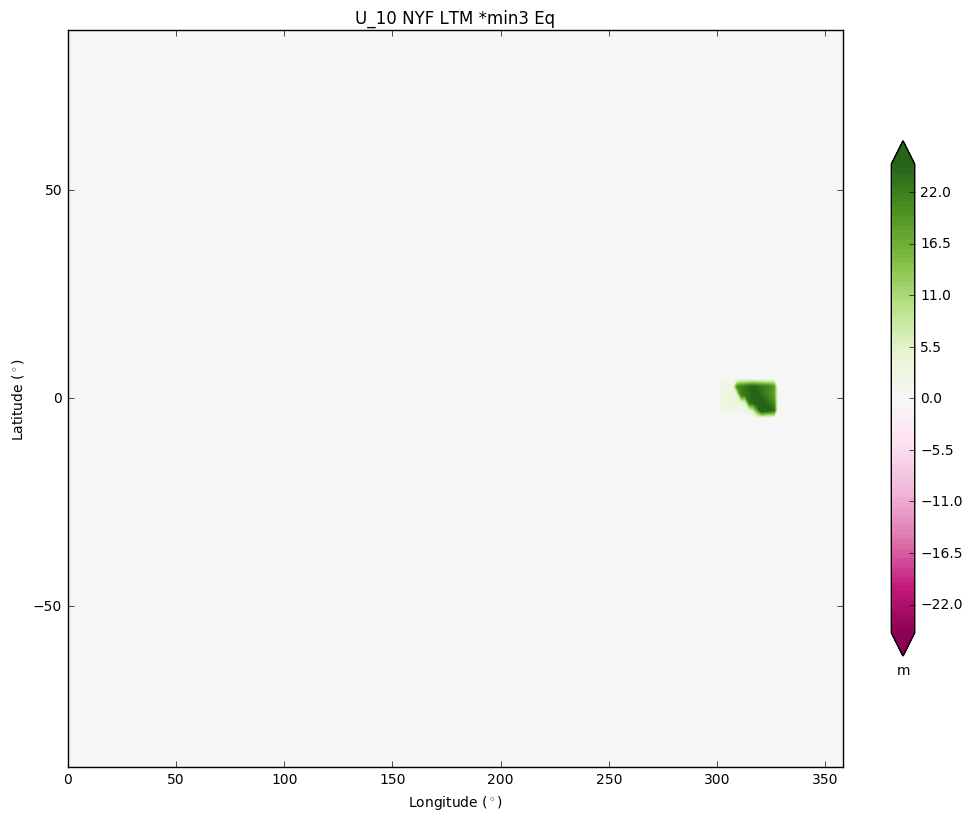

In [42]:
plt.contourf(lon,lat,np.mean(um,axis=0)-np.mean(uc,axis=0),cmap=plt.cm.PiYG,levels=clev,extend='both')
#plt.contourf(geolon_t,geolat_t,f.variables['vbot'][0],cmap=plt.cm.PiYG,levels=clev,extend='both')
cb=plt.colorbar(orientation='vertical',shrink = 0.7)
cb.ax.set_xlabel('m')

plt.ylabel('Latitude ($^\circ$)')
plt.xlabel('Longitude ($^\circ$)')
#plt.ylim([-80,90])
#plt.xlim([-280,80])
plt.title('U_10 NYF LTM *min3 Eq')

In [43]:
import netCDF4 as nc4

ofile = nc4.Dataset('/g/data1/v45/pas561/mom/input/u_10.AtlEEqxn3.nc', 'a')

var = ofile.variables['U_10_MOD']
print var.shape
print um.shape
var[:] = um

ofile.sync()
ofile.close()

(1460, 94, 192)
(1460, 94, 192)


In [12]:
#redo forcing off coast of Argentina ... strengthen zonal westerlies by factor of 3
#just add a +ve wind anomaly along coast.
# Extract the variables
file ='/g/data1/v45/pas561/mom/input/u_10.nc'

nc = Dataset(file, mode='r') # file handle, open in read only mode
lat = nc.variables['LAT'][:]
lon = nc.variables['LON'][:]
uc = nc.variables['U_10_MOD'][:]
nc.close() # close the file


In [13]:
#find values within lat lon bounds
tmp1=np.argwhere(lon>290)# and lon<320)
tmp2=np.argwhere(lon>302)# and lon<320)
tmp3=np.argwhere(lat>-55)# and lat<-45)
tmp4=np.argwhere(lat>-39)# and lat<-45)

lon_start, lon_end, lat_start, lat_end = tmp1[0][0], tmp2[0][0], tmp3[0][0], tmp4[0][0]

print lon[lon_start], lon[lon_end], lat[lat_start], lat[lat_end] 

print uc.shape



290.625 303.75 -54.2845993042 -37.14220047
(1460, 94, 192)


In [14]:
#um = uc.copy()
#um[:,lat_start:lat_end+1, lon_start:lon_end+1] = uc[:,lat_start:lat_end+1, lon_start:lon_end+1]*3
u_add = np.mean(uc[:,lat_start:lat_end+1, lon_start:lon_end+1],axis=0)
print u_add.shape
u_add = np.mean(u_add,axis=0)
print u_add.shape
u_add = np.mean(u_add,axis=0)
print u_add.shape
print u_add

(10, 8)
(8,)
()
3.44441


In [15]:
um = uc.copy()
um[:,lat_start:lat_end+1, lon_start:lon_end+1] = uc[:,lat_start:lat_end+1, lon_start:lon_end+1]+10


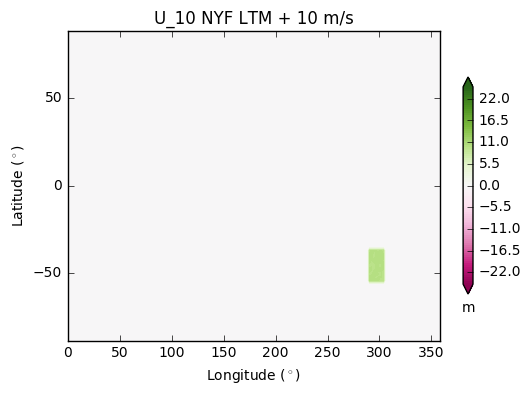

In [16]:
plt.contourf(lon,lat,np.mean(um,axis=0)-np.mean(uc,axis=0),cmap=plt.cm.PiYG,levels=clev,extend='both')
#plt.contourf(geolon_t,geolat_t,f.variables['vbot'][0],cmap=plt.cm.PiYG,levels=clev,extend='both')
cb=plt.colorbar(orientation='vertical',shrink = 0.7)
cb.ax.set_xlabel('m')

plt.ylabel('Latitude ($^\circ$)')
plt.xlabel('Longitude ($^\circ$)')
#plt.ylim([-80,90])
#plt.xlim([-280,80])
plt.title('U_10 NYF LTM + 10 m/s')

In [20]:
import netCDF4 as nc4

ofile = nc4.Dataset('/g/data1/v45/pas561/mom/input/u_10.ArgX3.nc', 'a')

var = ofile.variables['U_10_MOD']
print var.shape
print um.shape
var[:] = um

ofile.sync()
ofile.close()

(1460, 94, 192)
(1460, 94, 192)


In [21]:
#redo forcing off coast of Argentina ... weaken zonal westerlies by factor of 3
#just add a +ve wind anomaly along coast.
# Extract the variables
file ='/g/data1/v45/pas561/mom/input/u_10.nc'

nc = Dataset(file, mode='r') # file handle, open in read only mode
lat = nc.variables['LAT'][:]
lon = nc.variables['LON'][:]
uc = nc.variables['U_10_MOD'][:]
nc.close() # close the file


In [22]:
#find values within lat lon bounds
tmp1=np.argwhere(lon>290)# and lon<320)
tmp2=np.argwhere(lon>302)# and lon<320)
tmp3=np.argwhere(lat>-55)# and lat<-45)
tmp4=np.argwhere(lat>-39)# and lat<-45)

lon_start, lon_end, lat_start, lat_end = tmp1[0][0], tmp2[0][0], tmp3[0][0], tmp4[0][0]

print lon[lon_start], lon[lon_end], lat[lat_start], lat[lat_end] 

print uc.shape

290.625 303.75 -54.2845993042 -37.14220047
(1460, 94, 192)


In [23]:
um = uc.copy()
um[:,lat_start:lat_end+1, lon_start:lon_end+1] = uc[:,lat_start:lat_end+1, lon_start:lon_end+1]-15


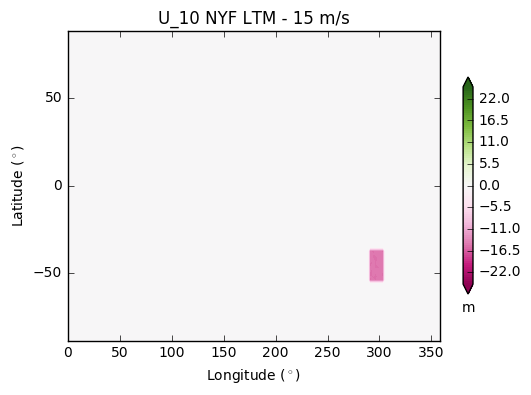

In [24]:
plt.contourf(lon,lat,np.mean(um,axis=0)-np.mean(uc,axis=0),cmap=plt.cm.PiYG,levels=clev,extend='both')
#plt.contourf(geolon_t,geolat_t,f.variables['vbot'][0],cmap=plt.cm.PiYG,levels=clev,extend='both')
cb=plt.colorbar(orientation='vertical',shrink = 0.7)
cb.ax.set_xlabel('m')

plt.ylabel('Latitude ($^\circ$)')
plt.xlabel('Longitude ($^\circ$)')
#plt.ylim([-80,90])
#plt.xlim([-280,80])
plt.title('U_10 NYF LTM - 15 m/s')

In [25]:
import netCDF4 as nc4

ofile = nc4.Dataset('/g/data1/v45/pas561/mom/input/u_10.ArgXn3.nc', 'a')

var = ofile.variables['U_10_MOD']
print var.shape
print um.shape
var[:] = um

ofile.sync()
ofile.close()

(1460, 94, 192)
(1460, 94, 192)


In [53]:
#just apply the weakened westerly anomaly across the entire Atlantic in the PI case
file ='/g/data1/v45/pas561/mom/input/u_10.nc'

nc = Dataset(file, mode='r') # file handle, open in read only mode
lat = nc.variables['LAT'][:]
lon = nc.variables['LON'][:]
uc = nc.variables['U_10_MOD'][:]
nc.close() # close the file

file ='/g/data1/v45/pas561/mom/input/u_10.30Sup15shift4.nc'

nc = Dataset(file, mode='r') # file handle, open in read only mode
lat = nc.variables['LAT'][:]
lon = nc.variables['LON'][:]
um = nc.variables['U_10_MOD'][:]
nc.close() # close the file


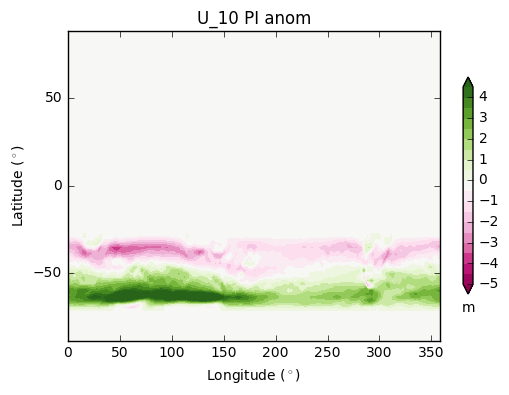

In [54]:
clev = np.arange(-5,5,0.5)

plt.contourf(lon,lat,np.mean(um,axis=0)-np.mean(uc,axis=0),cmap=plt.cm.PiYG,levels=clev,extend='both')
#plt.contourf(geolon_t,geolat_t,f.variables['vbot'][0],cmap=plt.cm.PiYG,levels=clev,extend='both')
cb=plt.colorbar(orientation='vertical',shrink = 0.7)
cb.ax.set_xlabel('m')

plt.ylabel('Latitude ($^\circ$)')
plt.xlabel('Longitude ($^\circ$)')
#plt.ylim([-80,90])
#plt.xlim([-280,80])
plt.title('U_10 PI anom')

(1460, 94, 192)


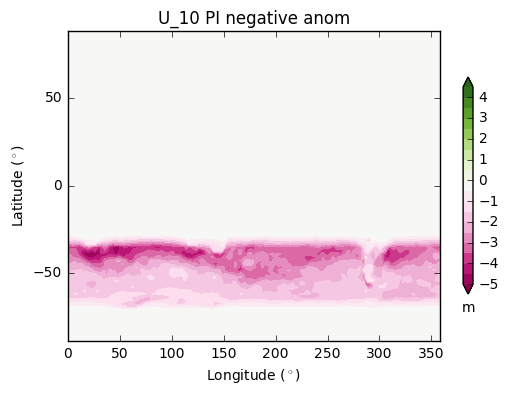

In [55]:
u_anom=um-uc
print u_anom.shape

tmp=u_anom>0

u_anom[tmp]=0.0

clev = np.arange(-5,5,0.5)

plt.contourf(lon,lat,np.mean(u_anom,axis=0),cmap=plt.cm.PiYG,levels=clev,extend='both')
#plt.contourf(geolon_t,geolat_t,f.variables['vbot'][0],cmap=plt.cm.PiYG,levels=clev,extend='both')
cb=plt.colorbar(orientation='vertical',shrink = 0.7)
cb.ax.set_xlabel('m')

plt.ylabel('Latitude ($^\circ$)')
plt.xlabel('Longitude ($^\circ$)')
#plt.ylim([-80,90])
#plt.xlim([-280,80])
plt.title('U_10 PI negative anom')


In [56]:
#isolate Atlantic basin north of drake passage

#print lon
#tmp1=np.argwhere(lon>290)# and lon<320)
#print tmp1.shape
#print tmp1
#lon_start, lon_end = tmp1[0][0], tmp1[-1][0]
#print lon[lon_start], lon[lon_end]

tmp1=np.argwhere(lon>21) 
tmp2=np.argwhere(lon>290)
lon_start, lon_end = tmp1[0][0], tmp2[0][0]
print lon[lon_start], lon[lon_end]

tmp3=np.argwhere(lat<-55)# and lat<-45)
lat_start, lat_end = tmp3[0][0], tmp3[-1][0]
print lat[lat_start], lat[lat_end]


22.5 290.625
-88.5419998169 -56.1893005371


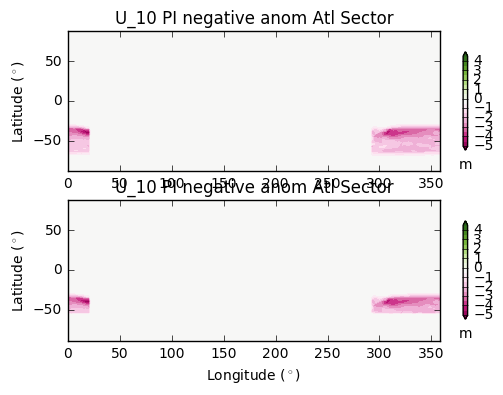

In [57]:
u_anom[:,:, lon_start:lon_end+1] = 0.0
#u_anom[:,lat_start:lat_end+1,:] = 0.0

#u_anom[:,lat_start:lat_end+1, lon_start:lon_end+1] = uc[:,lat_start:lat_end+1, lon_start:lon_end+1]-15

clev = np.arange(-5,5,0.5)

plt.subplot(2,1,1)
plt.contourf(lon,lat,np.mean(u_anom,axis=0),cmap=plt.cm.PiYG,levels=clev,extend='both')
#plt.contourf(geolon_t,geolat_t,f.variables['vbot'][0],cmap=plt.cm.PiYG,levels=clev,extend='both')
cb=plt.colorbar(orientation='vertical',shrink = 0.7)
cb.ax.set_xlabel('m')

plt.ylabel('Latitude ($^\circ$)')
plt.xlabel('Longitude ($^\circ$)')
#plt.ylim([-80,90])
#plt.xlim([-280,80])
plt.title('U_10 PI negative anom Atl Sector')

u_anom[:,lat_start:lat_end+1,:] = 0.0

clev = np.arange(-5,5,0.5)

plt.subplot(2,1,2)
plt.contourf(lon,lat,np.mean(u_anom,axis=0),cmap=plt.cm.PiYG,levels=clev,extend='both')
#plt.contourf(geolon_t,geolat_t,f.variables['vbot'][0],cmap=plt.cm.PiYG,levels=clev,extend='both')
cb=plt.colorbar(orientation='vertical',shrink = 0.7)
cb.ax.set_xlabel('m')

plt.ylabel('Latitude ($^\circ$)')
plt.xlabel('Longitude ($^\circ$)')
#plt.ylim([-80,90])
#plt.xlim([-280,80])
plt.title('U_10 PI negative anom Atl Sector')



In [60]:
um = uc.copy()
um=uc+u_anom

import netCDF4 as nc4

ofile = nc4.Dataset('/g/data1/v45/pas561/mom/input/u_10.AtlNeg55S.nc', 'a')

var = ofile.variables['U_10_MOD']
print var.shape
print um.shape
var[:] = um

ofile.sync()
ofile.close()

(1460, 94, 192)
(1460, 94, 192)


In [47]:
#do postive anomalies
#just apply the weakened westerly anomaly across the entire Atlantic in the PI case
file ='/g/data1/v45/pas561/mom/input/u_10.nc'

nc = Dataset(file, mode='r') # file handle, open in read only mode
lat = nc.variables['LAT'][:]
lon = nc.variables['LON'][:]
uc = nc.variables['U_10_MOD'][:]
nc.close() # close the file

file ='/g/data1/v45/pas561/mom/input/u_10.30Sup15shift4.nc'

nc = Dataset(file, mode='r') # file handle, open in read only mode
lat = nc.variables['LAT'][:]
lon = nc.variables['LON'][:]
um = nc.variables['U_10_MOD'][:]
nc.close() # close the file


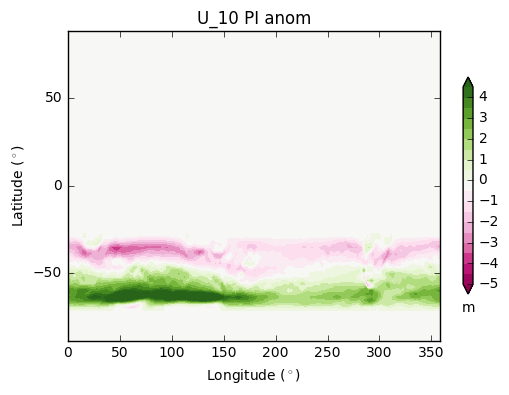

In [48]:
clev = np.arange(-5,5,0.5)

plt.contourf(lon,lat,np.mean(um,axis=0)-np.mean(uc,axis=0),cmap=plt.cm.PiYG,levels=clev,extend='both')
#plt.contourf(geolon_t,geolat_t,f.variables['vbot'][0],cmap=plt.cm.PiYG,levels=clev,extend='both')
cb=plt.colorbar(orientation='vertical',shrink = 0.7)
cb.ax.set_xlabel('m')

plt.ylabel('Latitude ($^\circ$)')
plt.xlabel('Longitude ($^\circ$)')
#plt.ylim([-80,90])
#plt.xlim([-280,80])
plt.title('U_10 PI anom')

(1460, 94, 192)


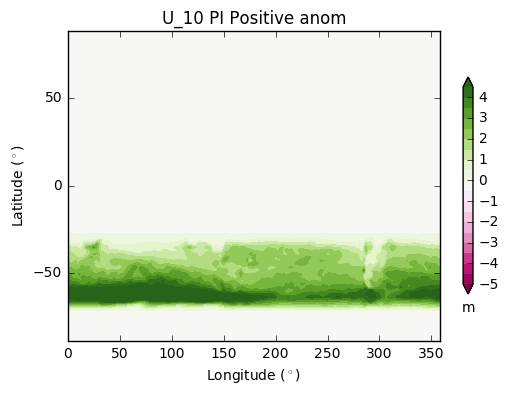

In [49]:
u_anom=um-uc
print u_anom.shape

tmp=u_anom<0

u_anom[tmp]=0.0

clev = np.arange(-5,5,0.5)

plt.contourf(lon,lat,np.mean(u_anom,axis=0),cmap=plt.cm.PiYG,levels=clev,extend='both')
#plt.contourf(geolon_t,geolat_t,f.variables['vbot'][0],cmap=plt.cm.PiYG,levels=clev,extend='both')
cb=plt.colorbar(orientation='vertical',shrink = 0.7)
cb.ax.set_xlabel('m')

plt.ylabel('Latitude ($^\circ$)')
plt.xlabel('Longitude ($^\circ$)')
#plt.ylim([-80,90])
#plt.xlim([-280,80])
plt.title('U_10 PI Positive anom')


In [50]:
#isolate Atlantic basin north of drake passage

#print lon
#tmp1=np.argwhere(lon>290)# and lon<320)
#print tmp1.shape
#print tmp1
#lon_start, lon_end = tmp1[0][0], tmp1[-1][0]
#print lon[lon_start], lon[lon_end]

tmp1=np.argwhere(lon>21) 
tmp2=np.argwhere(lon>290)
lon_start, lon_end = tmp1[0][0], tmp2[0][0]
print lon[lon_start], lon[lon_end]

tmp3=np.argwhere(lat<-55)# and lat<-45)
lat_start, lat_end = tmp3[0][0], tmp3[-1][0]
print lat[lat_start], lat[lat_end]


22.5 290.625
-88.5419998169 -56.1893005371


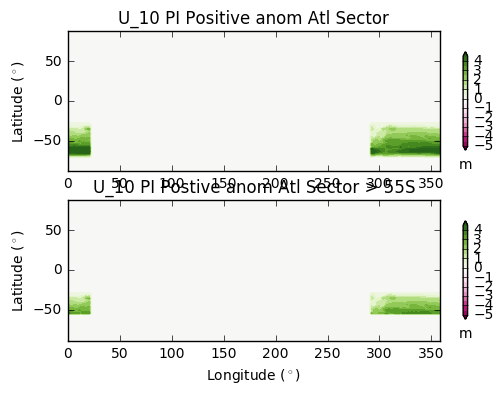

In [51]:
u_anom[:,:, lon_start:lon_end+1] = 0.0
#u_anom[:,lat_start:lat_end+1,:] = 0.0

#u_anom[:,lat_start:lat_end+1, lon_start:lon_end+1] = uc[:,lat_start:lat_end+1, lon_start:lon_end+1]-15

clev = np.arange(-5,5,0.5)

plt.subplot(2,1,1)
plt.contourf(lon,lat,np.mean(u_anom,axis=0),cmap=plt.cm.PiYG,levels=clev,extend='both')
#plt.contourf(geolon_t,geolat_t,f.variables['vbot'][0],cmap=plt.cm.PiYG,levels=clev,extend='both')
cb=plt.colorbar(orientation='vertical',shrink = 0.7)
cb.ax.set_xlabel('m')

plt.ylabel('Latitude ($^\circ$)')
plt.xlabel('Longitude ($^\circ$)')
#plt.ylim([-80,90])
#plt.xlim([-280,80])
plt.title('U_10 PI Positive anom Atl Sector')


u_anom2=u_anom.copy()
u_anom2[:,lat_start:lat_end+1,:] = 0.0

clev = np.arange(-5,5,0.5)

plt.subplot(2,1,2)
plt.contourf(lon,lat,np.mean(u_anom2,axis=0),cmap=plt.cm.PiYG,levels=clev,extend='both')
#plt.contourf(geolon_t,geolat_t,f.variables['vbot'][0],cmap=plt.cm.PiYG,levels=clev,extend='both')
cb=plt.colorbar(orientation='vertical',shrink = 0.7)
cb.ax.set_xlabel('m')

plt.ylabel('Latitude ($^\circ$)')
plt.xlabel('Longitude ($^\circ$)')
#plt.ylim([-80,90])
#plt.xlim([-280,80])
plt.title('U_10 PI Postive anom Atl Sector > 55S')



In [52]:
um = uc.copy()
um=uc+u_anom

import netCDF4 as nc4

ofile = nc4.Dataset('/g/data1/v45/pas561/mom/input/u_10.AtlPos.nc', 'a')

var = ofile.variables['U_10_MOD']
print var.shape
print um.shape
var[:] = um

ofile.sync()
ofile.close()

um = uc.copy()
um=uc+u_anom2

import netCDF4 as nc4

ofile = nc4.Dataset('/g/data1/v45/pas561/mom/input/u_10.AtlPos55S.nc', 'a')

var = ofile.variables['U_10_MOD']
print var.shape
print um.shape
var[:] = um

ofile.sync()
ofile.close()

(1460, 94, 192)
(1460, 94, 192)
(1460, 94, 192)
(1460, 94, 192)
